In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline

In [4]:
nc = 20
ns = 20
c_start = 5.
c_stop = 30.
s_start = -5.
s_stop = -25.
xt = np.arange(c_start, c_stop, step=0.2)
yt = np.arange(s_start, s_stop, step=-0.2)
# T = 45
T = -29.7
c = np.linspace(c_start, c_stop, nc)
s = np.linspace(s_start,s_stop, ns)
diagram_name_a = f'img/dia_C{str(c_start)}.{str(c_stop)}_S{str(s_start)}.{str(s_stop)}_T{str(T)}_A.png'
diagram_name_o = f'img/dia_C{str(c_start)}.{str(c_stop)}_S{str(s_start)}.{str(s_stop)}_T{str(T)}_O.png'
diagram_name_t = f'img/dia_C{str(c_start)}.{str(c_stop)}_S{str(s_start)}.{str(s_stop)}_T{str(T)}_T.png'
X, Y = np.meshgrid(c, s)
# X, Y

In [5]:
df = pd.read_csv('data_files/test02.csv')
df.head()

,C,S,T,A,Alpha,Theta,beta,dC,dS,zz,dCS,VCS,C+S,C/S,dC-dS
0,5.7,-23.4,-29.7,23.9,-77.0,140.4,38.0,-54.4,-11.3,73.3,55.56,24.08,-17.7,-0.24,-43.1
1,14.0,-22.0,-29.7,25.4,-58.3,138.7,38.9,-29.5,-4.0,50.6,29.77,26.08,-8.0,-0.64,-25.5
2,16.5,-20.0,-29.7,25.1,-50.9,139.0,38.7,-20.6,0.0,42.9,20.60,25.93,-3.5,-0.83,-20.6
3,15.5,-17.2,-29.7,22.6,-48.1,142.1,37.1,-17.0,2.0,41.3,17.12,23.15,-1.7,-0.90,-19.0
4,12.0,-14.5,-29.7,18.5,-50.6,147.6,34.9,-12.1,6.8,45.8,13.88,18.82,-2.5,-0.83,-18.9


In [6]:
def angles_to_rad(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    return c_a, s_a, t_a

def np_orientation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_oa)

def np_elevation_angle(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    t_a = np.radians(_t_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    a_oa = np.arctan2(np.tan(s_a), np.tan(c_a))
    a_azi = np.arctan2(-(np.sin(a_oa) + np.sin(a_oa - t_a)), (np.cos(a_oa) + np.cos(a_oa - t_a)))
    a_ele = np.arctan2(2 * np.sin(a_tad) * np.cos(0.5 * t_a), np.sin(t_a) * (1 + np.cos(a_tad)))
    a_aor = np.arccos(0.5 * (np.cos(t_a) + np.cos(a_tad) + np.cos(t_a) * np.cos(a_tad) - 1))
    return np.degrees(a_ele)


def np_true_angular_deformity(_c_a_d, _s_a_d, _t_a_d):
    c_a = np.radians(_c_a_d)
    s_a = np.radians(_s_a_d)
    h1 = np.sqrt(np.tan(c_a) * np.tan(c_a) + np.tan(s_a) * np.tan(s_a))
    a_tad = np.arctan2(h1, 1)
    return np.degrees(a_tad)

<ipython-input-28-011f64993301>:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 20, colors='black', linewidth=.5)


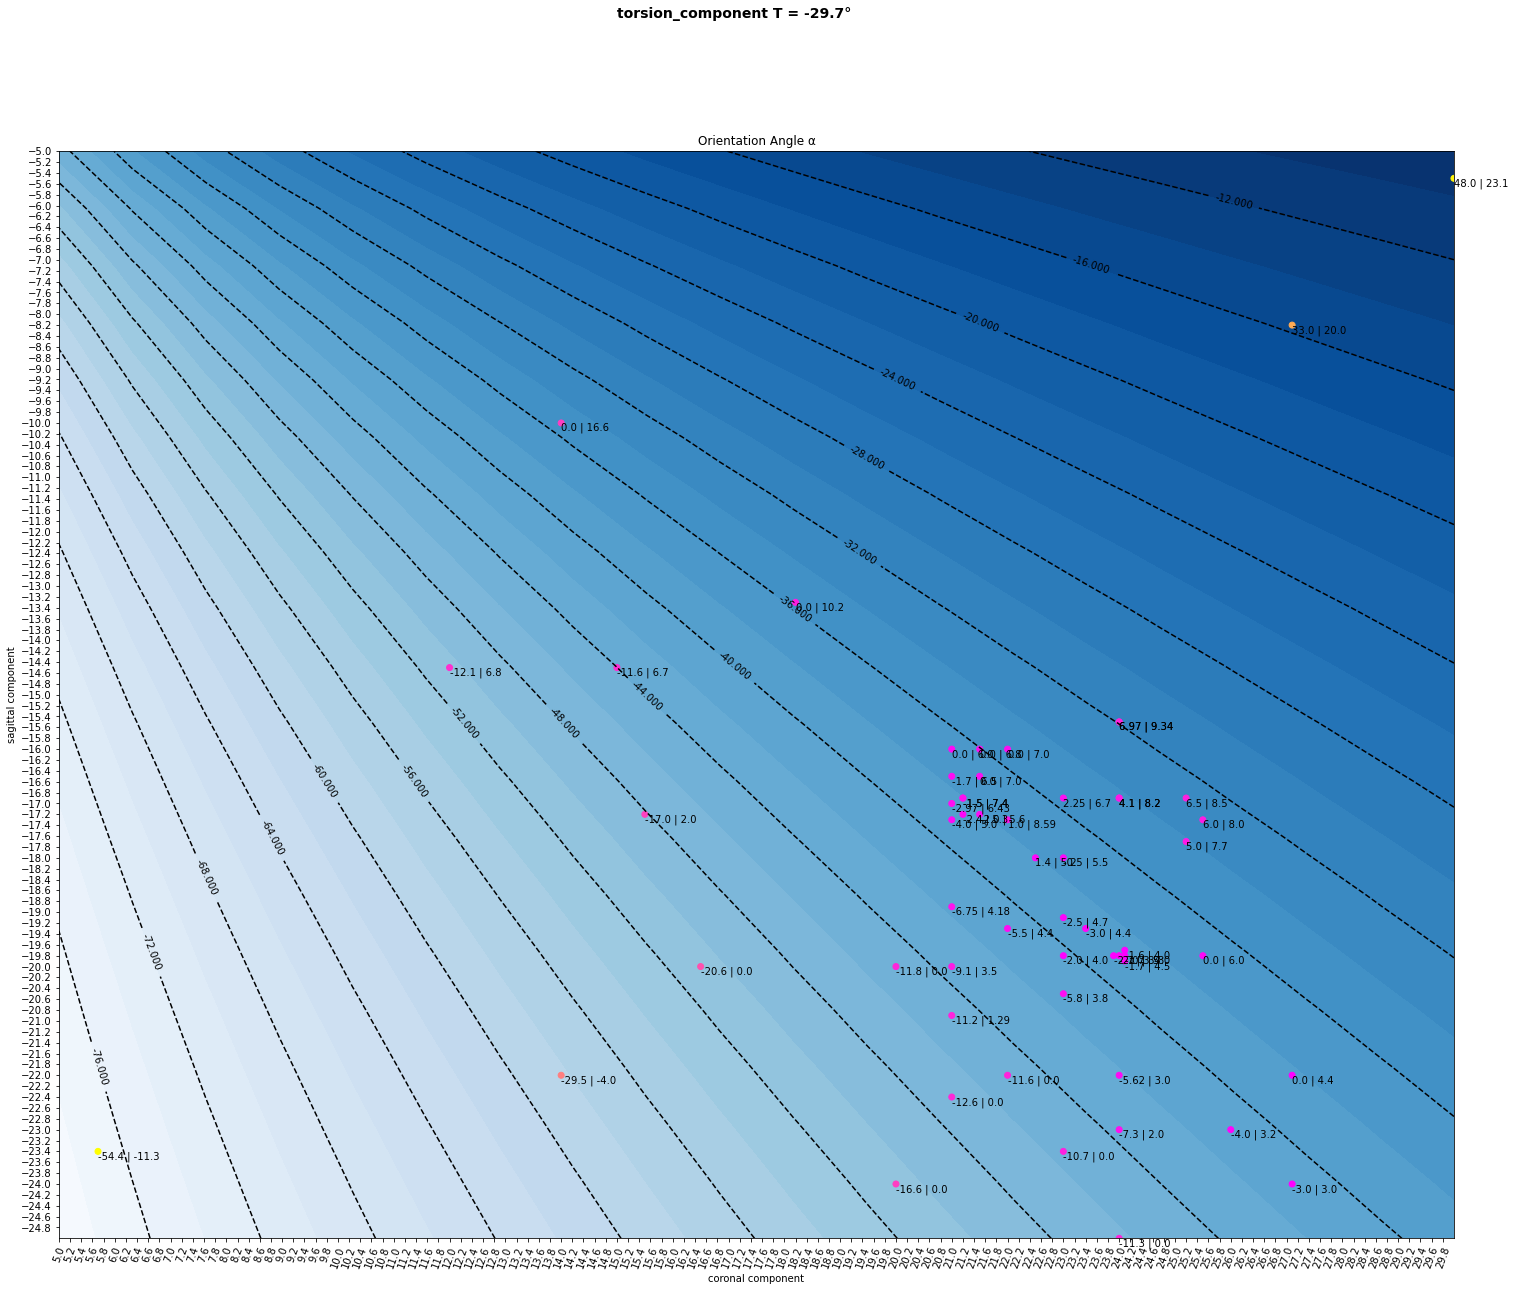

In [28]:
fig27 = plt.figure(figsize=(25,20))

fig27.suptitle(f'torsion_component T = {T}°', fontsize=14, fontweight='bold')
p_orientation = fig27.add_subplot(111, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_orientation.set_title(f'Orientation Angle {chr(945)}')
p_orientation.set_xlabel('coronal component')
p_orientation.set_ylabel('sagittal component')
img = p_orientation.contourf(X, Y, np_orientation_angle(X,Y,T), 40, cmap='Blues')
hl = p_orientation.contour(X, Y, np_orientation_angle(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
p_orientation.scatter(df['C'], df['S'], c=df['dCS'], cmap='spring')
# z = 4
# y = -5.1
# for value in enumerate(df['dC']):
#     z += 2
#     if z % 20 == 0:
#         z = 6
#         y -= 2
#     p_orientation.text(z, y, str(value), ha="left", va="top")
for value in enumerate(df['dC'], start=0):
   p_orientation.text(df['C'][value[0]], df['S'][value[0]], str(df['dC'][value[0]])+' | '+
                      str(df['dS'][value[0]]), ha="left", va="top")
fig27.savefig(diagram_name_o)

<ipython-input-10-7976106a9f76>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 20, colors='black', linewidth=.5)


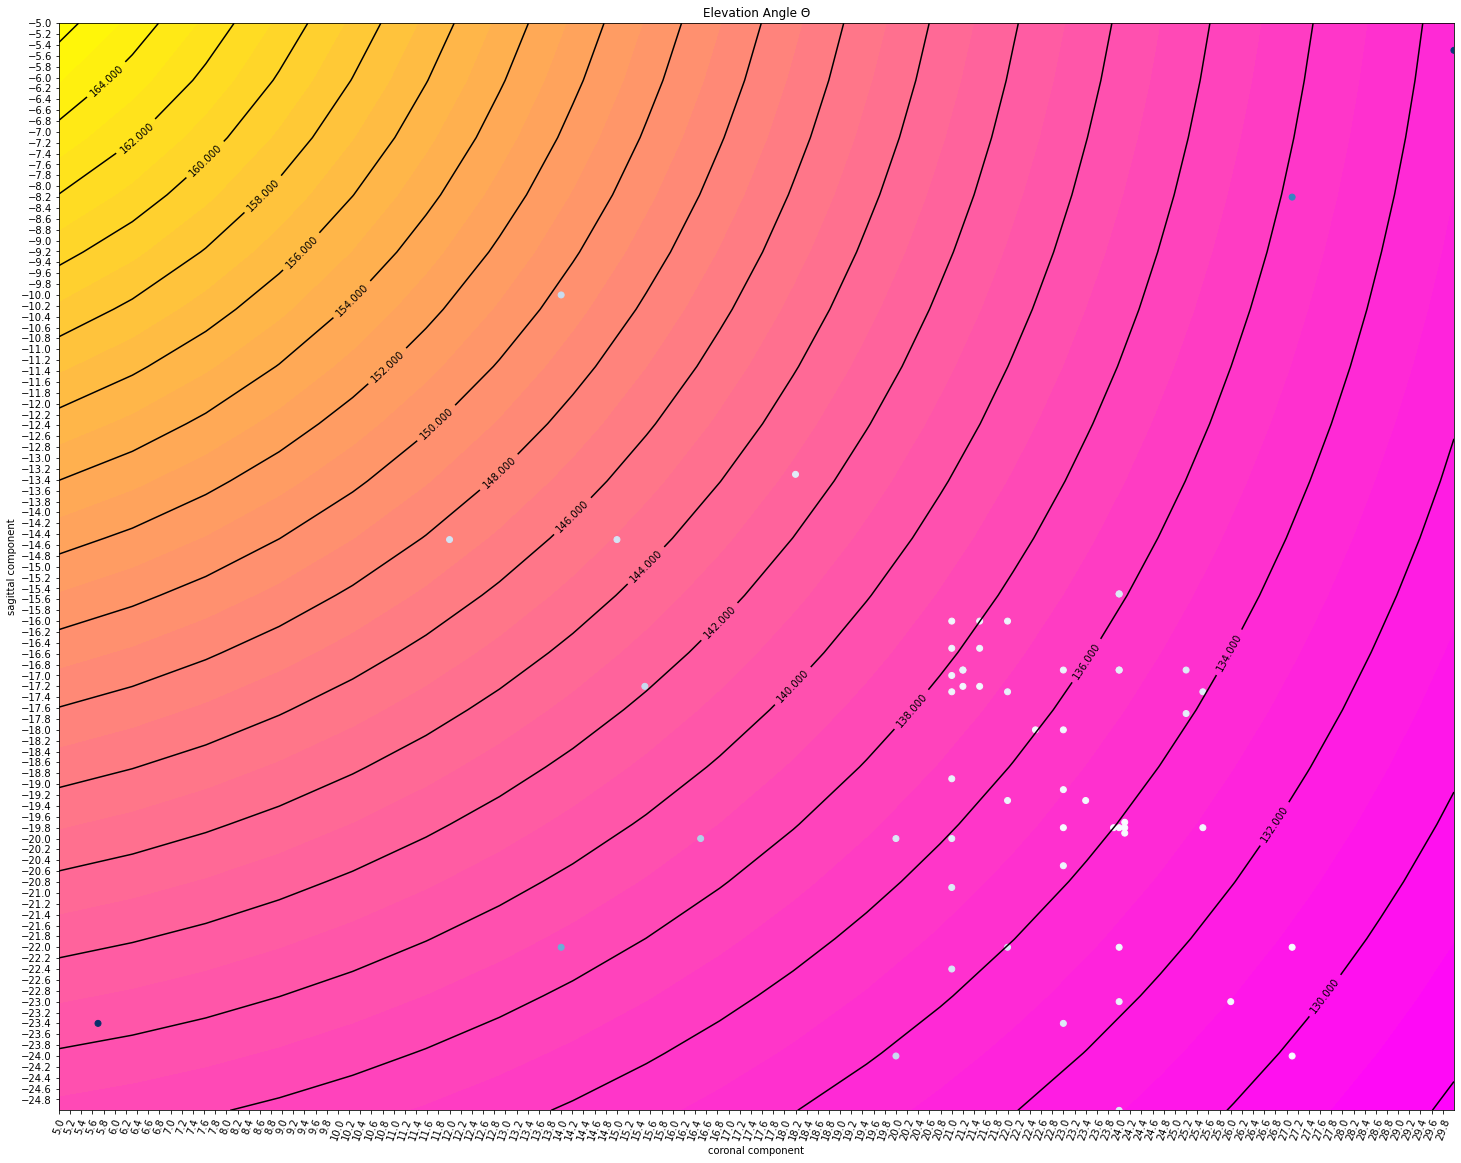

In [10]:
fig28 = plt.figure(figsize=(25,20))
p_elevation = fig28.add_subplot(111, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_elevation.set_title(f'Elevation Angle {chr(int("398", 16))}')
p_elevation.set_xlabel('coronal component')
p_elevation.set_ylabel('sagittal component')
img = p_elevation.contourf(X, Y, np_elevation_angle(X,Y,T), 40, cmap='spring')
hl = p_elevation.contour(X, Y, np_elevation_angle(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
p_elevation.scatter(df['C'], df['S'], c=df['dCS'], cmap='Blues')
fig28.savefig(diagram_name_t)

<ipython-input-9-a2d6520c2105>:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  hl = p_true_angular_deformity.contour(X, Y, np_true_angular_deformity(X,Y,T), 20, colors='black', linewidth=.5)


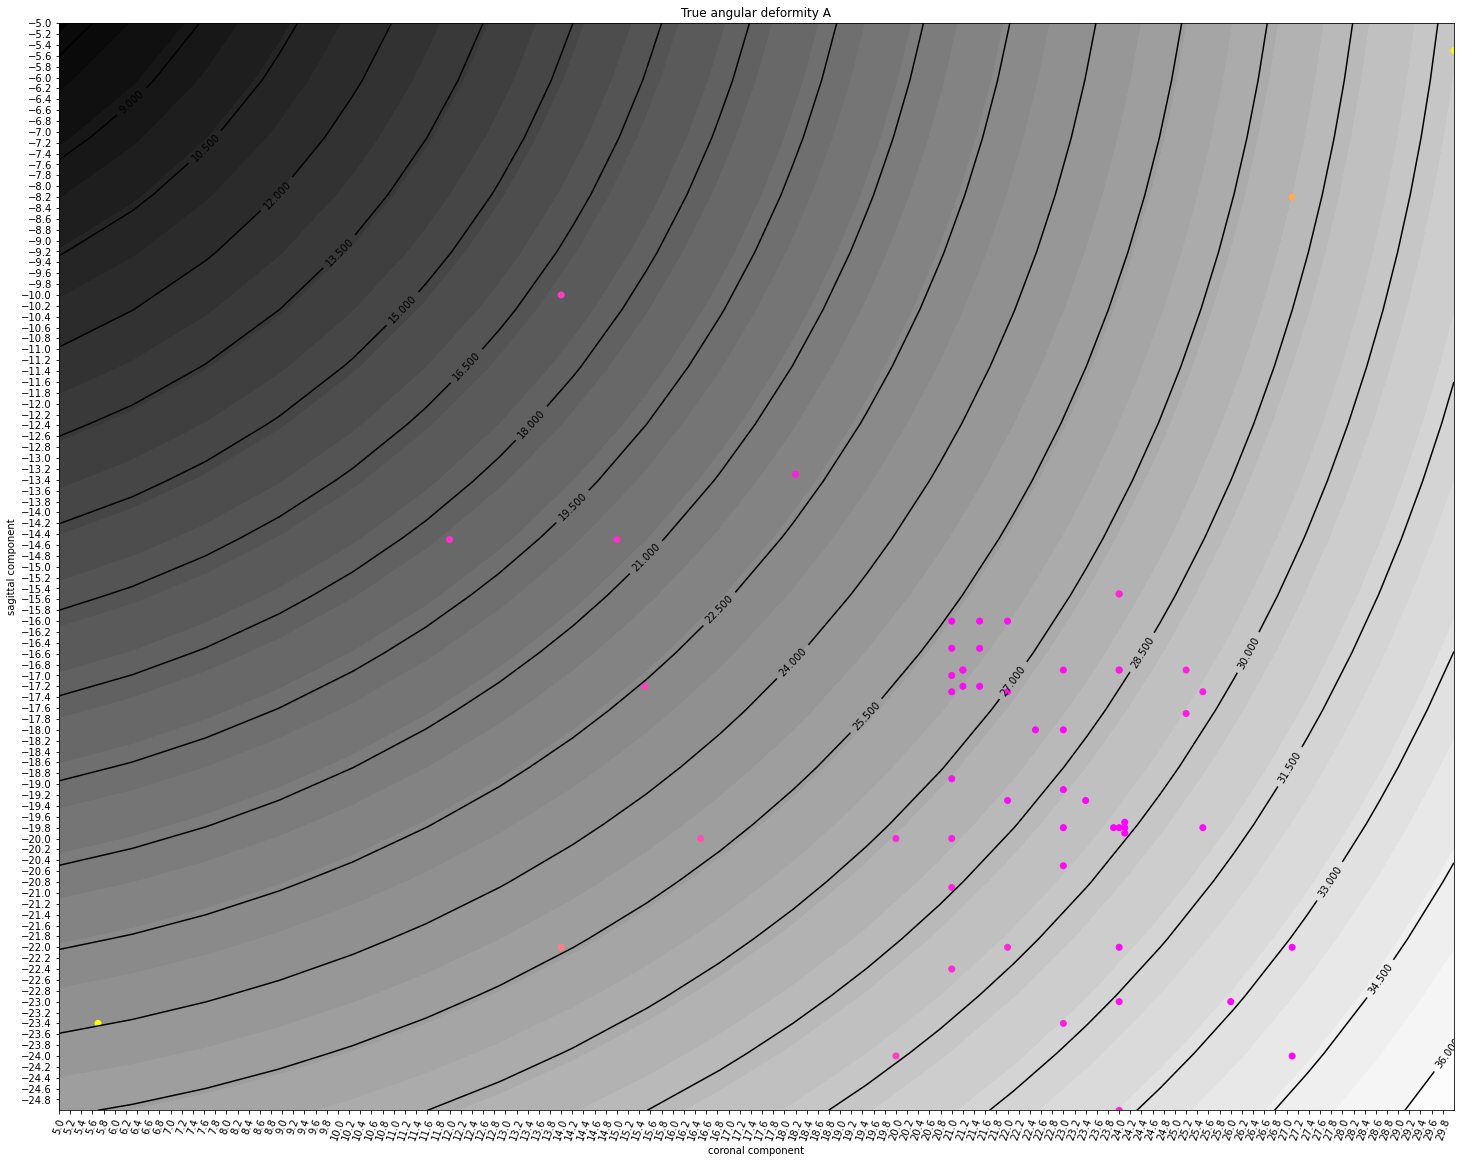

In [9]:
fig29 = plt.figure(figsize=(25,20))
p_true_angular_deformity = fig29.add_subplot(111, xticks=xt, yticks =yt)
plt.xticks(rotation=70)
p_true_angular_deformity.set_title(f'True angular deformity A')
p_true_angular_deformity.set_xlabel('coronal component')
p_true_angular_deformity.set_ylabel('sagittal component')
img = p_true_angular_deformity.contourf(X, Y, np_true_angular_deformity(X,Y,T), 40, cmap='gray')
hl = p_true_angular_deformity.contour(X, Y, np_true_angular_deformity(X,Y,T), 20, colors='black', linewidth=.5)
plt.clabel(hl, inline=1, fontsize=10)
p_true_angular_deformity.scatter(df['C'], df['S'], c=df['dCS'], cmap='spring')

# plt.subplots_adjust(hspace=0.2)
fig29.savefig(diagram_name_a)